#### <left>Бронников Максим Андреевич</left>

*M8О-307Б, №4 по списку*

#   <center>Лабораторная работа №3</center>
### <center> Задание №3 </center>

**Для таблично заданной функции путем решения нормальной системы МНК найти приближающие многочлены степени $n$. Для каждого из приближающих многочленов вычислить сумму квадратов ошибок. Построить графики приближаемой функции и приближающих многочленов.**

### <center> Вариант №4 </center>

$ x_i = 1.0, \; 1.9, \; 2.8, \; 3.7, \; 4.6, \; 5.5  $

$ y_i = 2.4142, \; 1.0818, \; 0.50953, \; 0.11836, \; -0.24008, \; -0.66818 $

а) $ n = 1 $

б) $ n = 2 $

## <center> Решение: </center>

### <center> Вспомогательные функции </center>

Импортируем бибилиотеки:

In [1]:
import matplotlib.pyplot as plt
import math
import sys
import numpy as np
from functools import reduce

*Метод Гаусса* для решения СЛАУ (считаем что $a_{ii} \ne 0, \; \forall i: \; 1 \leq i \leq n$):

$$
\begin{equation*}
 \begin{cases}
   \sum\limits_{i = 0}^{n} a_{0i} x_i = b_0
   \\
   ...
   \\
   \sum\limits_{i = 0}^{n} a_{ki} x_i = b_k
   \\
   ...
   \\
   \sum\limits_{i = 0}^{n} a_{ni} x_i = b_n
 \end{cases}
\end{equation*}
$$

In [2]:
def lu_solve(L, U, b):
    x = list(b)
    for i in range(1, len(x)):
        for j in range(i):
            x[i] -= L[i][j]*x[j]

    for i in range(len(x) - 1, -1, -1):
        for j in range(i + 1, len(x)):
            x[i] -= U[i][j]*x[j]
        x[i] /= U[i][i]
    return x
        



def gauss_solution(A, b):
    L = [[0.0 for _ in l] for l in A]
    U = [list(l) for l in A]
    for j in range(len(A)):
        L[j][j] = 1.0
        for i in range(j + 1, len(A)):
            L[i][j] = U[i][j] / U[j][j]
            for k in range(j, len(A)):
                U[i][k] -= U[j][k] * L[i][j]
    return lu_solve(L, U, b)

Функция вычисления суммы квадратов ошибок вычислений $ E = \sum\limits_{j = 0}^{N} (F_n(x_j) - y_j)^2 $ приближенной функции $ F_n $ степени $ n $ в $ N $ заданных точках $ (x_j, y_j) $:

In [3]:
def error_value(F, X, Y):
    return reduce(lambda x, y: x + y, map(lambda v: (F(v[0]) - v[1])**2, zip(X, Y)))

### <center> Метод Наименьших Квадратов </center>

Коеффиценты $a_i, \; \forall i: \; 0 \leq i < n$ находятся из решения системы из $n + 1$ уравнения: 

$$
\begin{equation*}
 \begin{cases}
   \sum\limits_{i = 0}^{n} a_i \sum\limits^{N}_{j = 0} x^i = \sum\limits_{j = 0}^{N} y_j
   \\
   ...
   \\
   \sum\limits_{i = 0}^{n} a_i \sum\limits^{N}_{j = 0} x^{i+k} = \sum\limits_{j = 0}^{N} y_j x_{j}^{k}
   \\
   ...
   \\
   \sum\limits_{i = 0}^{n} a_i \sum\limits^{N}_{j = 0} x^{i+n} = \sum\limits_{j = 0}^{N} y_j x_{j}^{n}
 \end{cases}
\end{equation*}
$$

In [4]:
def count_a(X, Y, n):
    A = []
    b = []
    N = len(X)
    for k in range(n + 1):
        A.append([sum(map(lambda x: x**(i + k), X)) for i in range(n + 1)])
        b.append(sum(map(lambda x: x[0] * x[1]**k, zip(Y, X))))
    return gauss_solution(A, b)

Функция вычисляет приближенный многочлен $ F_n(x) = \displaystyle\sum\limits_{i = 0}^n a_i x^i $ по Методу Наименьших Квадратов проводя препроцессинг коеффицентов $ a_i $ путем минимизации функции ошибки $ E = \sum\limits_{j = 0}^{N} (F_n(x_j) - y_j)^2 $:

In [5]:
def MNK_func(X, Y, n):
    a = count_a(X, Y, n)
    #print("Коэффицеты а приближающего многочлена:", a)
    return lambda x: sum([a[i] * x**i for i in range(n + 1)])

### <center> *Демонстрация работы* </center>

**а)** Начальные значения задаем в коде:

In [6]:
X1 = [1.0, 1.9, 2.8, 3.7, 4.6, 5.5]
Y1 = [2.4142, 1.0818, 0.50953, 0.11836, -0.24008, -0.66818]
n = 1
#Xi = [0.0, 1.7, 3.4, 5.1, 6.8, 8.5]
#Yi = [0.0, 1.3038, 1.8439, 2.2583, 2.6077, 2.9155]
#n = 2

*Ошибка МНК:*

In [7]:
F1 = MNK_func(X1, Y1, n)

print("Значение квадрата ошибки:", error_value(F1, X1, Y1))

Значение квадрата ошибки: 0.4701221112819048


*Графическое отображение:*

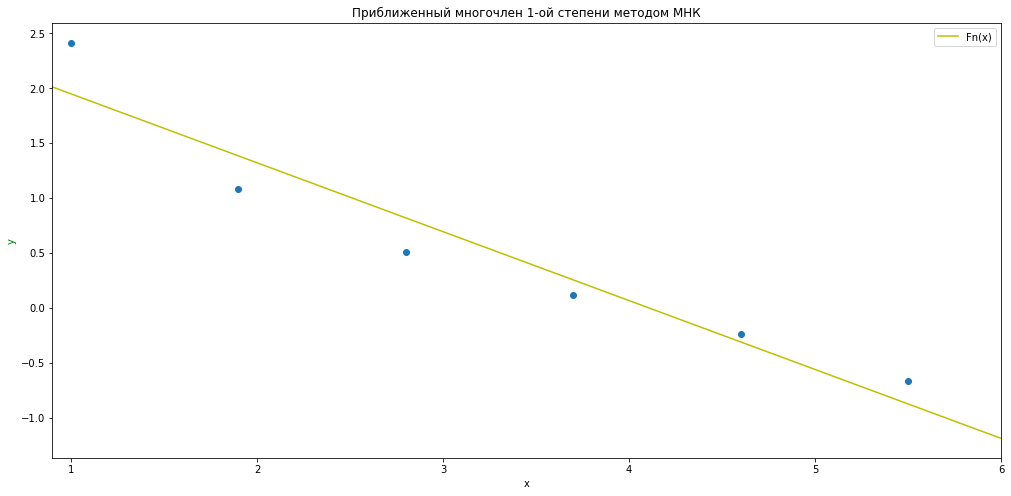

In [8]:
x = np.arange(0.9, 6.0, 0.005)

y = list(map(F1, x)) 

fig = plt.figure(figsize=(17, 8))
ax1 = fig.add_subplot(111)

line1, = ax1.plot(x, y, 'y', label="f(x)")
ax1.set_xlabel('x')
ax1.set_ylabel('y', color='g')

ax1.plot(list(X1), list(Y1), 'o', label = "Points")

# set title, plot limits, etc
plt.title('Приближенный многочлен 1-ой степени методом МНК')
plt.xlim(0.9, 6.0)


# add a legend, and position it on the upper right
plt.legend((line1,), ("Fn(x)",))

plt.show()

**б)** Начальные данные считаем из файла:

In [9]:
X2 = []
Y2 = []
with open("data/d3.txt", "r") as file:
    X2 = list(map(float, file.readline().split()))
    Y2 = list(map(float, file.readline().split()))
    n = int(file.readline())

*Ошибка МНК:*

In [10]:
F2 = MNK_func(X2, Y2, n)

print("Значение квадрата ошибки:", error_value(F2, X2, Y2))

Значение квадрата ошибки: 0.12595314327714296


*Графическое отображение:*

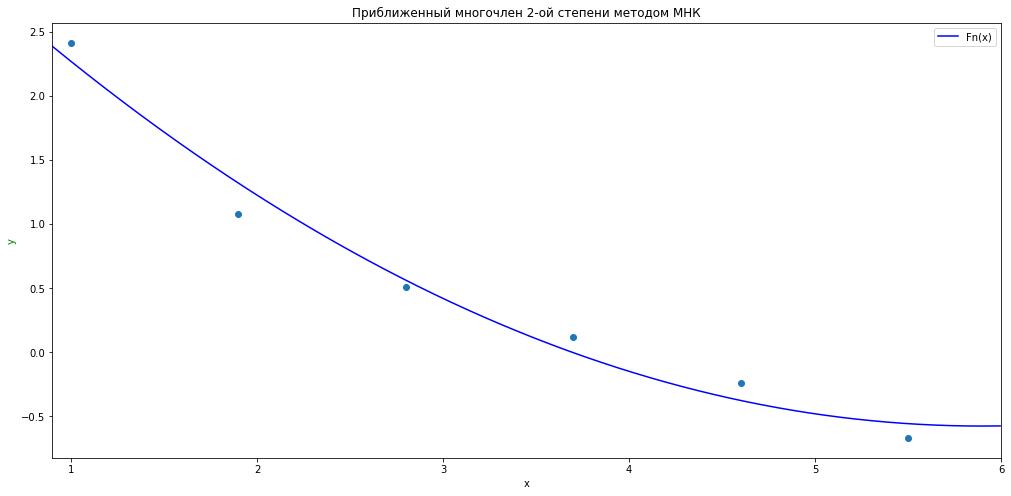

In [11]:
x = np.arange(0.9, 6.0, 0.005)

y = list(map(F2, x)) 

fig = plt.figure(figsize=(17, 8))
ax1 = fig.add_subplot(111)

line1, = ax1.plot(x, y, 'b', label="f(x)")
ax1.set_xlabel('x')
ax1.set_ylabel('y', color='g')

ax1.plot(list(X2), list(Y2), 'o', label = "Points")

# set title, plot limits, etc
plt.title('Приближенный многочлен 2-ой степени методом МНК')
plt.xlim(0.9, 6.0)


# add a legend, and position it on the upper right
plt.legend((line1,), ("Fn(x)",))

plt.show()

###### <center>Сделано Бронниковым Максимом</center>
###### <center>06.04.2020</center>